In [1]:
from sympy import *
init_printing()

import numpy as np
import xarray as xr
import itertools as Iter

import yt
yt.toggle_interactivity()

import matplotlib.pyplot as plt
%matplotlib notebook

Using matplotlib backend: Qt5Agg


# Electrostatic Charge Density from  Bhooshan 
https://www.amazon.com/Fundamentals-Engineering-Electromagnetics-Sunil-Bhooshan/dp/0198077947/ref=sr_1_4?

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Electrostatic-Charge-Density-from--Bhooshan" data-toc-modified-id="Electrostatic-Charge-Density-from--Bhooshan-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Electrostatic Charge Density from  Bhooshan</a></span></li><li><span><a href="#Generate-the-xarray-dataset-for-the-data" data-toc-modified-id="Generate-the-xarray-dataset-for-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Generate the xarray dataset for the data</a></span></li><li><span><a href="#importing-the-xarray-to-yt" data-toc-modified-id="importing-the-xarray-to-yt-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>importing the xarray to yt</a></span><ul class="toc-item"><li><span><a href="#THIS-IS-WHERE-NumFOCUS-AND-YT-NEED-TO-GET-THERE-ACT-TOGETHER!!!!!!!!!!!!" data-toc-modified-id="THIS-IS-WHERE-NumFOCUS-AND-YT-NEED-TO-GET-THERE-ACT-TOGETHER!!!!!!!!!!!!-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>THIS IS WHERE NumFOCUS AND YT NEED TO GET THERE ACT TOGETHER!!!!!!!!!!!!</a></span><ul class="toc-item"><li><span><a href="#how-do-I-set-the-TF" data-toc-modified-id="how-do-I-set-the-TF-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>how do I set the TF</a></span></li><li><span><a href="#how-do-I-add-a-colorbar-and-axis-lables" data-toc-modified-id="how-do-I-add-a-colorbar-and-axis-lables-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>how do I add a colorbar and axis lables</a></span></li></ul></li></ul></li><li><span><a href="#?-How-to-move-the-camera-interactively-in-the-notebook" data-toc-modified-id="?-How-to-move-the-camera-interactively-in-the-notebook-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>? How to move the camera interactively in the notebook</a></span></li><li><span><a href="#Charge-total" data-toc-modified-id="Charge-total-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Charge total</a></span></li><li><span><a href="#Charge-Total-YT-vis" data-toc-modified-id="Charge-Total-YT-vis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Charge Total YT vis</a></span></li><li><span><a href="#What-else-can-YT-do-on-the-anylsis-side" data-toc-modified-id="What-else-can-YT-do-on-the-anylsis-side-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>What else can YT do on the anylsis side</a></span></li></ul></div>

In [2]:
x, y, z=symbols('x, y, z', real=True)

In [3]:
ChargeDen=symbols('rho_v'); ChargeDen

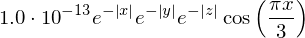

In [4]:
ChargeDenExp=10e-14*cos(pi*x/3)*exp(-abs(x))*exp(-abs(y))*exp(-abs(z))
ChargeDenExp

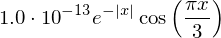

In [5]:
ChargeDenExpX=10e-14*cos(pi*x/3)*exp(-abs(x)); ChargeDenExpX

Workaround for Piecewise And3 at the moment, will only work for separable functions

In [6]:
ChargeDenExpY=exp(-abs(y)); ChargeDenExpY

In [7]:
ChargeDenExpZ=exp(-abs(z)); ChargeDenExpZ

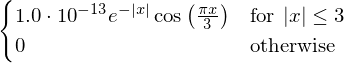

In [8]:
PX=Piecewise(
    ( ChargeDenExpX, abs(x)<=3),
    (0, True)
)
PX

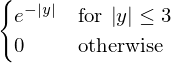

In [9]:
PY=Piecewise(
    ( ChargeDenExpY, abs(y)<=3),
    (0, True)
)
PY

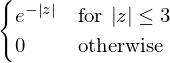

In [10]:
PZ=Piecewise(
    ( ChargeDenExpZ, abs(z)<=3),
    (0, True)
)
PZ

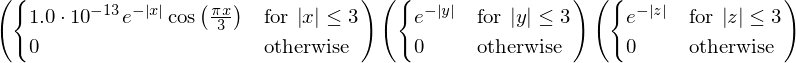

In [11]:
P=PX*PY*PZ; P

In [12]:
PN=lambdify((x, y, z), P, dummify=False)
PN(1,1,1)


# Generate the xarray dataset for the data

In [13]:
DomainSpaceSize = 6 # using cartesian 3D
SpaceDensity = [10] # 100 divisions in space 5 in time


In [14]:
x_coord = np.linspace(-DomainSpaceSize, +DomainSpaceSize, SpaceDensity[0])
y_coord = np.linspace(-DomainSpaceSize, +DomainSpaceSize, SpaceDensity[0])
z_coord = np.linspace(-DomainSpaceSize, +DomainSpaceSize, SpaceDensity[0])

In [15]:
CoorEnterFunc = lambda x, y, z: 1+0*x+0*y+0*z

dx=xr.DataArray(x_coord, dims='x')
dy=xr.DataArray(y_coord, dims='y')
dz=xr.DataArray(z_coord, dims='z')

In [16]:
SimDataSet = xr.Dataset({'ChargeDen':(['x', 'y', 'z'], PN(*np.meshgrid(x_coord, y_coord, z_coord)))},
                  coords={'x':x_coord, 'y':y_coord, 'z':z_coord})
SimDataSet.attrs['units']={'ChargeDen':'C/m**3'}
SimDataSet

<xarray.Dataset>
Dimensions:    (x: 10, y: 10, z: 10)
Coordinates:
  * x          (x) float64 -6.0 -4.667 -3.333 -2.0 -0.6667 0.6667 2.0 3.333 ...
  * y          (y) float64 -6.0 -4.667 -3.333 -2.0 -0.6667 0.6667 2.0 3.333 ...
  * z          (z) float64 -6.0 -4.667 -3.333 -2.0 -0.6667 0.6667 2.0 3.333 ...
Data variables:
    ChargeDen  (x, y, z) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
Attributes:
    units:    {'ChargeDen': 'C/m**3'}

# importing the xarray to yt
## THIS IS WHERE NumFOCUS AND YT NEED TO GET THERE ACT TOGETHER!!!!!!!!!!!!

till said parties get there act together had to deconstruct the xarray 

In [17]:
YTDataObj= dict(density = (np.array(SimDataSet['ChargeDen']), 'g/m**3'))
#would not except unit in SimDataSet.attrs['units']['ChargeDen'] had to fake with
#'g/m**3'

In [18]:
bbox=[]
for i in ['x', 'y', 'z']:
    bbox.append([float(SimDataSet.coords[i].min()), float(SimDataSet.coords[i].max())])
bbox=np.array(bbox)
bbox

array([[-6.,  6.],
       [-6.,  6.],
       [-6.,  6.]])

In [19]:
YTDataObj = yt.load_uniform_grid(YTDataObj, SimDataSet['ChargeDen'].shape, length_unit="m", bbox=bbox, nprocs=64)


yt : [INFO     ] 2018-02-21 16:28:12,435 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-02-21 16:28:12,436 Parameters: domain_dimensions         = [10 10 10]
yt : [INFO     ] 2018-02-21 16:28:12,437 Parameters: domain_left_edge          = [-6. -6. -6.]
yt : [INFO     ] 2018-02-21 16:28:12,439 Parameters: domain_right_edge         = [ 6.  6.  6.]
yt : [INFO     ] 2018-02-21 16:28:12,440 Parameters: cosmological_simulation   = 0.0


In [20]:
tf = yt.ColorTransferFunction((SimDataSet['ChargeDen'].min(), SimDataSet['ChargeDen'].max()), grey_opacity=False)
tf.map_to_colormap(SimDataSet['ChargeDen'].min(), SimDataSet['ChargeDen'].max(), scale=15.0, colormap='algae')


In [21]:
DenScene = yt.create_scene(YTDataObj, 'density')
source = DenScene[0]


In [22]:
DenScene.camera.set_width(DenScene.quan(7, 'm'))


yt : [INFO     ] 2018-02-21 16:28:16,994 Rendering scene (Can take a while).
yt : [INFO     ] 2018-02-21 16:28:16,996 Creating volume
/home/iridium/anaconda3/lib/python3.6/site-packages/yt/units/yt_array.py:1293: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
/home/iridium/anaconda3/lib/python3.6/site-packages/yt/units/yt_array.py:1293: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2018-02-21 16:28:17,118 Creating transfer function
yt : [INFO     ] 2018-02-21 16:28:17,119 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.


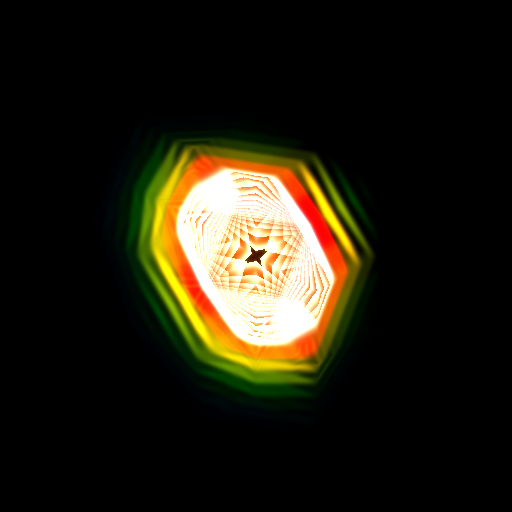

In [23]:
#having troupel setting the transfer function to the sceane
DenScene.show(sigma_clip=1)


### how do I set the TF
### how do I add a colorbar and axis lables

# ? How to move the camera interactively in the notebook
Is there a way to keep the scene and just re-render the image from the camera and then write a jupyter notebook widget for camera control

# Charge total

In [24]:
xdp, xdn, ydp, ydn, zdp, zdn=symbols('x_dp, x_dn, y_dp, y_dn, z_dp, z_dn')

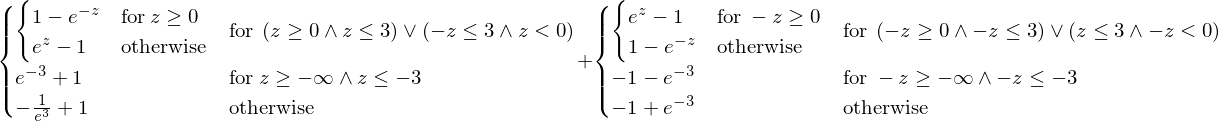

In [25]:
Qz=Integral(simplify(PZ.rewrite(Piecewise)), (z, 0, zdp))+Integral(simplify(PZ.rewrite(Piecewise)), (z, zdn, 0))
Qz=simplify(Qz.doit().subs({zdn: -z, zdp: z})); Qz

In [26]:
QzN=lambdify(z, Qz); QzN(-3.5), QzN(-1.5), QzN(1.5), QzN(3.5)

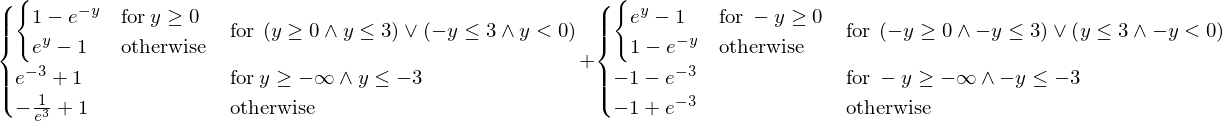

In [27]:
Qy=Integral(simplify(PY.rewrite(Piecewise)), (y, 0, ydp))+Integral(simplify(PY.rewrite(Piecewise)), (y, ydn, 0))
Qy=simplify(Qy.doit().subs({ydn: -y, ydp: y})); Qy

In [28]:
QyN=lambdify(y, Qy); QyN(-3.5), QyN(-1.5), QyN(1.5), QyN(3.5)

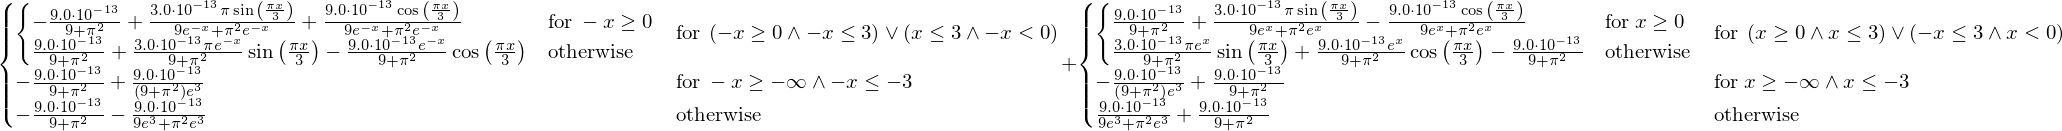

In [29]:
Qx=Integral(simplify(PX.rewrite(Piecewise)), (x, 0, xdp))+Integral(simplify(PX.rewrite(Piecewise)), (x, xdn, 0))
Qx=simplify(Qx.doit().subs({xdn: -x, xdp: x})); Qx

In [30]:
QxN=lambdify(x, Qx); QxN(-3.5), QxN(-1.5), QxN(1.5), QxN(3.5)

In [31]:
QN=lambda x, y, z: QxN(x)*QyN(y)*QzN(z)
QN(-3.5, -1.5, 2.5)

In [32]:
SimDataSet['chargeAcc']=(['x', 'y', 'z',],QN(*np.meshgrid(x_coord, y_coord, z_coord)))
SimDataSet.attrs['units']['chargeAcc']='C'
SimDataSet

<xarray.Dataset>
Dimensions:    (x: 10, y: 10, z: 10)
Coordinates:
  * x          (x) float64 -6.0 -4.667 -3.333 -2.0 -0.6667 0.6667 2.0 3.333 ...
  * y          (y) float64 -6.0 -4.667 -3.333 -2.0 -0.6667 0.6667 2.0 3.333 ...
  * z          (z) float64 -6.0 -4.667 -3.333 -2.0 -0.6667 0.6667 2.0 3.333 ...
Data variables:
    ChargeDen  (x, y, z) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    chargeAcc  (x, y, z) float64 -4.709e-17 -4.709e-17 -4.709e-17 8.178e-16 ...
Attributes:
    units:    {'ChargeDen': 'C/m**3', 'chargeAcc': 'C'}

# Charge Total YT vis

Dont know how to append a new field to a a YT data storage object

In [33]:
YTDataObj2= dict(density = (np.array(SimDataSet['chargeAcc']), 'g/m**3'))
#would not except unit in SimDataSet.attrs['units']['ChargeDen'] had to fake with
#'g/m**3'

In [34]:
YTDataObj2 = yt.load_uniform_grid(YTDataObj2, SimDataSet['chargeAcc'].shape, length_unit="m", bbox=bbox, nprocs=64)


yt : [INFO     ] 2018-02-21 16:28:32,703 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-02-21 16:28:32,704 Parameters: domain_dimensions         = [10 10 10]
yt : [INFO     ] 2018-02-21 16:28:32,705 Parameters: domain_left_edge          = [-6. -6. -6.]
yt : [INFO     ] 2018-02-21 16:28:32,706 Parameters: domain_right_edge         = [ 6.  6.  6.]
yt : [INFO     ] 2018-02-21 16:28:32,707 Parameters: cosmological_simulation   = 0.0


In [35]:
tf2 = yt.ColorTransferFunction((SimDataSet['chargeAcc'].min(), SimDataSet['chargeAcc'].max()), grey_opacity=False)
tf2.map_to_colormap(SimDataSet['chargeAcc'].min(), SimDataSet['chargeAcc'].max(), scale=15.0, colormap='algae')


In [36]:
ChargeScene = yt.create_scene(YTDataObj2, 'density')
source2 = ChargeScene[0]


In [37]:
ChargeScene.camera.set_width(ChargeScene.quan(7, 'm'))


yt : [INFO     ] 2018-02-21 16:28:33,233 Rendering scene (Can take a while).
yt : [INFO     ] 2018-02-21 16:28:33,235 Creating volume
/home/iridium/anaconda3/lib/python3.6/site-packages/yt/units/yt_array.py:1293: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2018-02-21 16:28:33,421 Creating transfer function
yt : [INFO     ] 2018-02-21 16:28:33,422 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.


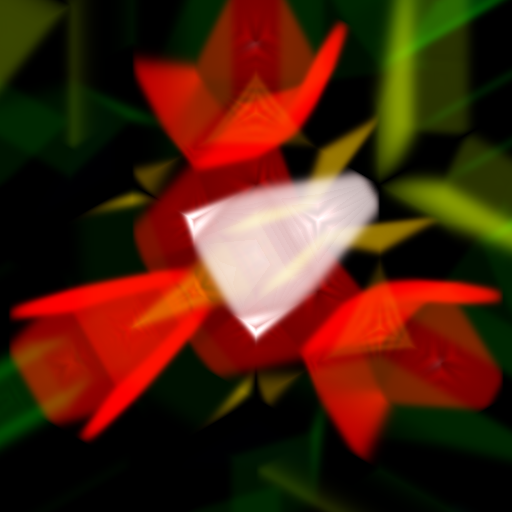

In [38]:
ChargeScene.show(sigma_clip=3)


# What else can YT do on the anylsis side
such as
1. can it perfrom find the E fields numericaly of $$E=\iiint_V   \frac{\rho_V(x', y', z')|r-r'|}{4\pi\epsilon_0 |r-r'|^3}dV'$$
2. similary can it find the V 